In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pickle as pkl


In [2]:

# Load the car details dataset
car_data = pd.read_csv('/content/Cardetails.csv')



In [3]:
#Data preprocessing
car_data.drop(columns=['torque'], inplace=True)
car_data.dropna(inplace=True)
car_data.drop_duplicates(inplace=True)


In [4]:

# Data cleaning functions
def extract_brand(car_name):
    return car_name.split(' ')[0].strip()

def clean_value(value):
    value = value.split(' ')[0].strip()
    if value == '':
        value = 0
    return float(value)


In [5]:

# Apply data cleaning functions
car_data['name'] = car_data['name'].apply(extract_brand)
car_data['mileage'] = car_data['mileage'].apply(clean_value)
car_data['max_power'] = car_data['max_power'].apply(clean_value)
car_data['engine'] = car_data['engine'].apply(clean_value)


In [6]:
for i in car_data.columns:
  print("Unique vaules of"+i)
  print(car_data[i].unique())
  print("---------------------------------------------------------------")

Unique vaules ofname
['Maruti' 'Skoda' 'Honda' 'Hyundai' 'Toyota' 'Ford' 'Renault' 'Mahindra'
 'Tata' 'Chevrolet' 'Datsun' 'Jeep' 'Mercedes-Benz' 'Mitsubishi' 'Audi'
 'Volkswagen' 'BMW' 'Nissan' 'Lexus' 'Jaguar' 'Land' 'MG' 'Volvo' 'Daewoo'
 'Kia' 'Fiat' 'Force' 'Ambassador' 'Ashok' 'Isuzu' 'Opel']
---------------------------------------------------------------
Unique vaules ofyear
[2014 2006 2010 2007 2017 2001 2011 2013 2005 2009 2016 2012 2002 2015
 2018 2019 2008 2020 1999 2000 2003 2004 1994 1998 1997 1995 1996]
---------------------------------------------------------------
Unique vaules ofselling_price
[  450000   370000   158000   225000   130000   440000    96000    45000
   350000   200000   500000    92000   280000   180000   400000   778000
   150000   680000   174000   950000   525000   600000   575000   275000
   300000   220000   254999   670000   730000   650000   330000   366000
  1149000   425000  2100000   925000   675000   819999   390000  1500000
   700000  1450000

In [7]:

# Encode categorical variables with numerical values
car_data['name'].replace({
    'Maruti': 1, 'Skoda': 2, 'Honda': 3, 'Hyundai': 4, 'Toyota': 5, 'Ford': 6, 'Renault': 7,
    'Mahindra': 8, 'Tata': 9, 'Chevrolet': 10, 'Datsun': 11, 'Jeep': 12, 'Mercedes-Benz': 13,
    'Mitsubishi': 14, 'Audi': 15, 'Volkswagen': 16, 'BMW': 17, 'Nissan': 18, 'Lexus': 19,
    'Jaguar': 20, 'Land': 21, 'MG': 22, 'Volvo': 23, 'Daewoo': 24, 'Kia': 25, 'Fiat': 26,
    'Force': 27, 'Ambassador': 28, 'Ashok': 29, 'Isuzu': 30, 'Opel': 31
}, inplace=True)


In [8]:

car_data['transmission'].replace({'Manual': 1, 'Automatic': 2}, inplace=True)
car_data['seller_type'].replace({'Individual': 1, 'Dealer': 2, 'Trustmark Dealer': 3}, inplace=True)
car_data['fuel'].replace({'Diesel': 1, 'Petrol': 2, 'LPG': 3, 'CNG': 4}, inplace=True)
car_data['owner'].replace({'First Owner': 1, 'Second Owner': 2, 'Third Owner': 3, 'Fourth & Above Owner': 4,
                            'Test Drive Car': 5}, inplace=True)


In [9]:

# Reset index
car_data.reset_index(drop=True, inplace=True)


In [10]:

# Visualize some data
plt.figure(figsize=(12, 6))


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'Histogram of Selling Price')

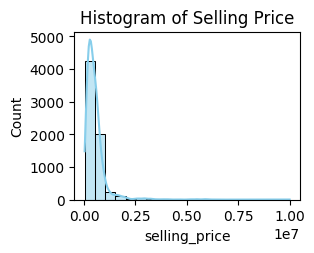

In [11]:

# Histogram of selling price
plt.subplot(2, 2, 1)
sns.histplot(car_data['selling_price'], bins=20, kde=True, color='skyblue')
plt.title('Histogram of Selling Price')


Text(0.5, 1.0, 'Year vs Selling Price')

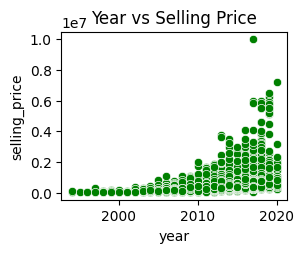

In [12]:

# Scatter plot of year vs selling price
plt.subplot(2, 2, 2)
sns.scatterplot(x='year', y='selling_price', data=car_data, color='green')
plt.title('Year vs Selling Price')


Text(0.5, 1.0, 'Transmission vs Selling Price')

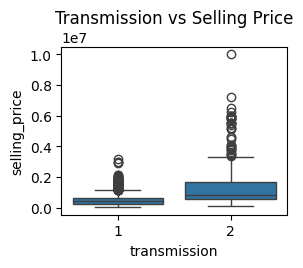

In [13]:

# Boxplot of transmission type vs selling price
plt.subplot(2, 2, 3)
sns.boxplot(x='transmission', y='selling_price', data=car_data)
plt.title('Transmission vs Selling Price')


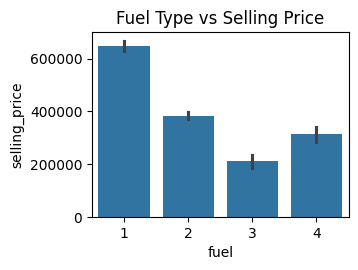

In [14]:

# Barplot of fuel type vs selling price
plt.subplot(2, 2, 4)
sns.barplot(x='fuel', y='selling_price', data=car_data)
plt.title('Fuel Type vs Selling Price')

plt.tight_layout()
plt.show()


In [15]:

# Separate input and output data
X = car_data.drop(columns=['selling_price'])
y = car_data['selling_price']


In [16]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [17]:

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [18]:

# Make predictions
predictions = model.predict(X_test)


In [19]:

# Create a sample input data for testing the model
sample_data = pd.DataFrame([[5, 2022, 12000, 1, 1, 1, 1, 12.99, 2494.0, 100.6, 5.0]],
                           columns=['name', 'year', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner',
                                    'mileage', 'engine', 'max_power', 'seats'])


In [20]:
# Make prediction using the sample input data
sample_prediction = model.predict(sample_data)


In [21]:

# Save the model to a file using pickle
with open('car_price_model.pkl', 'wb') as file:
    pkl.dump(model, file)

In [22]:
import os
print(os.getcwd())


/content
